In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_parquet('data/Transactions.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
isfraud = df.groupby(["type", "isFraud", "isFlaggedFraud"])["type"].count()
isfraud_df = isfraud.to_frame(name='count').reset_index()
isfraud_df.columns = ["type", "Actual Fraud", "Flagged Fraud", "Count"]
isfraud_df["Actual Fraud"] = isfraud_df["Actual Fraud"].apply(lambda x: "Yes" if x==1 else "No")
isfraud_df

,type,Actual Fraud,Flagged Fraud,Count
0,CASH_IN,No,0,1399284
1,CASH_OUT,No,0,2233384
2,CASH_OUT,Yes,0,4116
3,DEBIT,No,0,41432
4,PAYMENT,No,0,2151495
5,TRANSFER,No,0,528812
6,TRANSFER,Yes,0,4081
7,TRANSFER,Yes,1,16


# Distribution by the type of transection

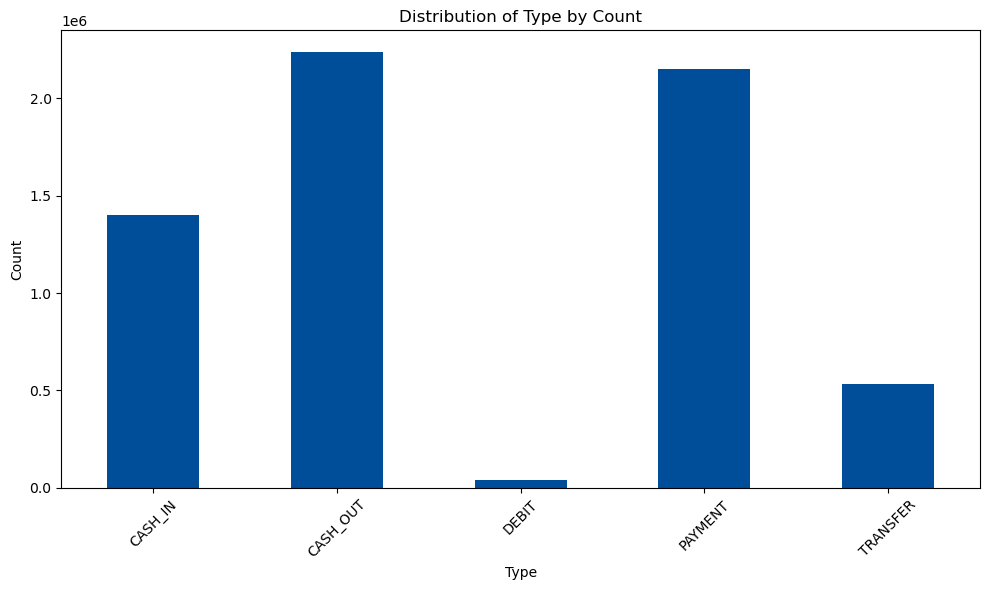

In [8]:
# Group by type and sum the counts
type_counts = isfraud_df.groupby("type")["Count"].sum()
# Create a bar plot
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='#004d99')
plt.title('Distribution of Type by Count')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

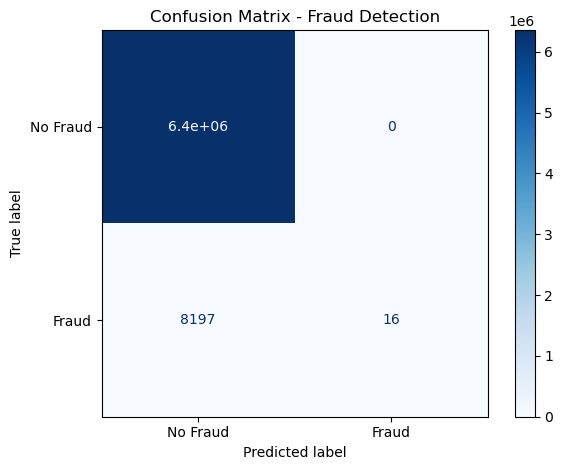

In [9]:
df = df.rename(columns = {"isFraud": "Actual Fraud", "isFlaggedFraud": "Detected Fraud"})

cm = confusion_matrix(df["Actual Fraud"], df["Detected Fraud"])

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Fraud Detection')
plt.tight_layout()
plt.show()